In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz as gv
from graphviz import Source
from sklearn import tree
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24
#Source( tree.export_graphviz(dtreg, out_file=None, feature_names=X.columns))

In [2]:
test_data = pd.read_csv(os.path.join('../data', 'cleanLoanDataValidationAllIncome.csv'))
pd.set_option('display.max_columns', None)
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,0,1,0,1,0,5720.0,0.0,110000.0,360.0,1,2,5720.0
1,0,1,1,1,0,3076.0,1500.0,126000.0,360.0,1,2,4576.0
2,0,1,2,1,0,5000.0,1800.0,208000.0,360.0,1,2,6800.0
3,0,1,2,1,0,2340.0,2546.0,100000.0,360.0,0,2,4886.0
4,0,0,0,0,0,3276.0,0.0,78000.0,360.0,1,2,3276.0
...,...,...,...,...,...,...,...,...,...,...,...,...
340,0,1,3,0,1,4009.0,1777.0,113000.0,360.0,1,2,5786.0
341,0,1,0,1,0,4158.0,709.0,115000.0,360.0,1,2,4867.0
342,0,0,0,1,0,3250.0,1993.0,126000.0,360.0,0,1,5243.0
343,0,1,0,1,0,5000.0,2393.0,158000.0,360.0,1,0,7393.0


In [3]:
train_data = pd.read_csv(os.path.join('../data', 'cleanLoanDataTrainAllIncome.csv'))
pd.set_option('display.max_columns', None)
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,1,1,0,4583.0,1508.0,128000.0,360.0,1,0,0,6091.0
1,0,1,0,1,1,3000.0,0.0,66000.0,360.0,1,2,1,3000.0
2,0,1,0,0,0,2583.0,2358.0,120000.0,360.0,1,2,1,4941.0
3,0,0,0,1,0,6000.0,0.0,141000.0,360.0,1,2,1,6000.0
4,0,1,2,1,1,5417.0,4196.0,267000.0,360.0,1,2,1,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,1,0,0,1,0,2900.0,0.0,71000.0,360.0,1,0,1,2900.0
559,0,1,3,1,0,4106.0,0.0,40000.0,180.0,1,0,1,4106.0
560,0,1,1,1,0,8072.0,240.0,253000.0,360.0,1,2,1,8312.0
561,0,1,2,1,0,7583.0,0.0,187000.0,360.0,1,2,1,7583.0


## 1. Decision Tree: all factors, random_state = 57

In [76]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [77]:
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns
feature_names_all = feature_names

In [78]:
from sklearn import tree

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [80]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6595744680851063

In [81]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 

graph.format = 'png'
graph.render('../static/images/Decision_tree_1',view=True)

#graph 

'../static/images/Decision_tree_1.png'

## 2. Decision Tree: all factors, random_state = 57, max_depth = 3 

In [82]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [83]:
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [84]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [85]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7304964539007093

In [86]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_2',view=True)

'../static/images/Decision_tree_2.png'

## 3. Decision Tree: take out Loan_Amount_Term, random_state = 57, max_depth = 3

In [88]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [89]:
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [91]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7446808510638298

In [92]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_3',view=True)

'../static/images/Decision_tree_3.png'

## 4. Decision Tree: take out Loan_Amount_Term  and LoanAmount , random_state = 57, max_depth = 3

In [93]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [94]:
data = train_data.drop(["Loan_Status", 'LoanAmount', 'Loan_Amount_Term', "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [96]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.75177304964539

In [97]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_4',view=True)

'../static/images/Decision_tree_4.png'

## 5a. Random Forest 1a: random_state = 57, n_estimators = 200, Combined income

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [28]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7535545023696683
Test score:  0.7304964539007093


In [29]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.26751194446314003, 'TotalIncome'),
 (0.2506787264060159, 'LoanAmount'),
 (0.18845602560351435, 'Credit_History'),
 (0.06255119470338683, 'Property_Area'),
 (0.05951070724529947, 'Dependents'),
 (0.05784762704602971, 'Loan_Amount_Term'),
 (0.030307274996285632, 'Education'),
 (0.02929194620229262, 'Married'),
 (0.027043700457177983, 'Self_Employed'),
 (0.02680085287685757, 'Gender')]

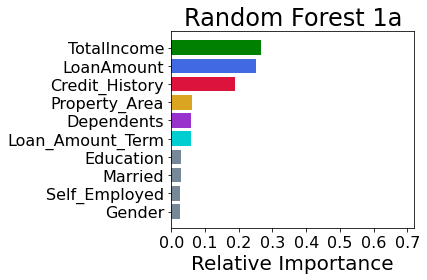

In [30]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 10
colors[9] = 'green'
colors[8] = 'royalblue'
colors[7] = 'crimson'
colors[6] = 'goldenrod'
colors[5] = 'darkorchid'#dep
colors[4] = 'darkturquoise'#mar
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('Random Forest 1a', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_1a.png')
plt.show()

## 5b. Random Forest 1b: random_state = 57, n_estimators = 200, Applicant and co-applicant income separate

In [31]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome"], axis=1)
feature_names = data.columns

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [33]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7440758293838863
Test score:  0.7163120567375887


In [34]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.20795701205163394, 'ApplicantIncome'),
 (0.20378073214291015, 'LoanAmount'),
 (0.18819766952751976, 'Credit_History'),
 (0.1292187472664216, 'CoapplicantIncome'),
 (0.05612631333534827, 'Property_Area'),
 (0.05558733374369, 'Loan_Amount_Term'),
 (0.054272457354144474, 'Dependents'),
 (0.02919875768242529, 'Education'),
 (0.027399867435982165, 'Gender'),
 (0.026388285234481692, 'Married'),
 (0.021872824225442827, 'Self_Employed')]

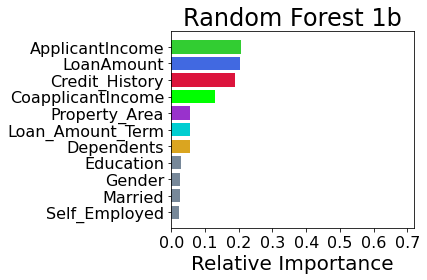

In [35]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 11
colors[10] = 'limegreen'
colors[9] = 'royalblue'
colors[8] = 'crimson'
colors[7] = 'lime'
colors[6] = 'darkorchid'#dep
colors[5] = 'darkturquoise'#mar
colors[4] = 'goldenrod'#mar
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('Random Forest 1b', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_1b.png')
plt.show()

## 6a. Random Forest 2a: take out Loan_Amount_Term, random_state = 57, n_estimators = 200, Combined income

In [36]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [38]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7535545023696683
Test score:  0.7304964539007093


In [39]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2875701621228967, 'TotalIncome'),
 (0.27218313513349907, 'LoanAmount'),
 (0.19074466903495213, 'Credit_History'),
 (0.06283928061064123, 'Dependents'),
 (0.06271339438933383, 'Property_Area'),
 (0.03318173033384731, 'Education'),
 (0.03233384633584726, 'Married'),
 (0.03039673200290975, 'Gender'),
 (0.028037050036072698, 'Self_Employed')]

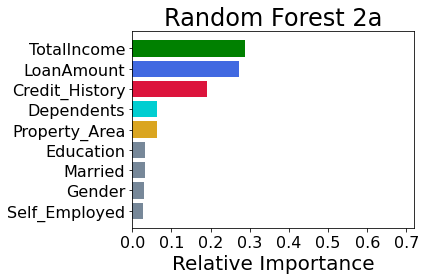

In [40]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 9
colors[8] = 'green'
colors[7] = 'royalblue'
colors[6] = 'crimson'
colors[5] = 'darkturquoise'
colors[4] = 'goldenrod'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('Random Forest 2a', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_2a.png')
plt.show()

## 6b. Random Forest 2b: take out Loan_Amount_Term, random_state = 57, n_estimators = 200, Applicant and co-applicant income separate

In [41]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "TotalIncome"], axis=1)
feature_names = data.columns

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [43]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7369668246445498
Test score:  0.7092198581560284


In [44]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2228437878213918, 'ApplicantIncome'),
 (0.22282958414196516, 'LoanAmount'),
 (0.18114675874957017, 'Credit_History'),
 (0.1405153093711443, 'CoapplicantIncome'),
 (0.05955220968832184, 'Property_Area'),
 (0.05709812099236861, 'Dependents'),
 (0.030875154020804894, 'Education'),
 (0.029719118028470156, 'Married'),
 (0.02834272475856228, 'Self_Employed'),
 (0.02707723242740079, 'Gender')]

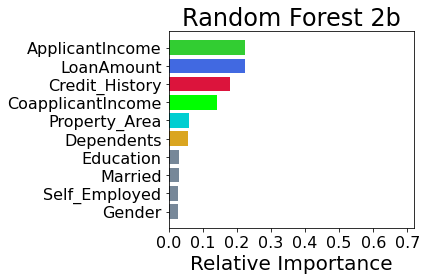

In [45]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 10
colors[9] = 'limegreen'
colors[8] = 'royalblue'
colors[7] = 'crimson'
colors[6] = 'lime'
colors[5] = 'darkturquoise'
colors[4] = 'goldenrod'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('Random Forest 2b', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_2b.png')
plt.show()

## 7a. Random Forest 3a: take out Loan_Amount_Term  and LoanAmount columns, random_state = 57, n_estimators = 200, Combined income

In [46]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", 'LoanAmount', 'Loan_Amount_Term',"ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [48]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.7132701421800948
Test score:  0.6808510638297872


In [49]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5076412172223285, 'TotalIncome'),
 (0.19487450698416248, 'Credit_History'),
 (0.08740360355150119, 'Dependents'),
 (0.07776764428602775, 'Property_Area'),
 (0.0354560510713576, 'Education'),
 (0.03317542241236437, 'Married'),
 (0.03209351974702491, 'Gender'),
 (0.03158803472523323, 'Self_Employed')]

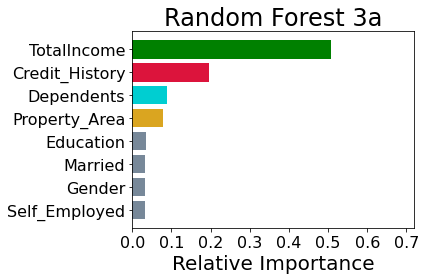

In [50]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 8
colors[7] = 'green'
colors[6] = 'crimson'
colors[5] = 'darkturquoise'
colors[4] = 'goldenrod'
plt.title('Random Forest 3a', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_3a.png')
plt.show()



## 7b. Random Forest 3b: take out Loan_Amount_Term  and LoanAmount columns, random_state = 57, n_estimators = 200, Applicant and co-applicant income separate

In [51]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", 'LoanAmount', 'Loan_Amount_Term',"TotalIncome"], axis=1)
feature_names = data.columns

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [53]:
 # Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6990521327014217
Test score:  0.7163120567375887


In [54]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.348400493102032, 'ApplicantIncome'),
 (0.19093342606700953, 'Credit_History'),
 (0.18530612113701922, 'CoapplicantIncome'),
 (0.0762041830399786, 'Dependents'),
 (0.06723374472080527, 'Property_Area'),
 (0.0357810180667011, 'Education'),
 (0.03491677342423561, 'Married'),
 (0.03126805565151135, 'Gender'),
 (0.029956184790707285, 'Self_Employed')]

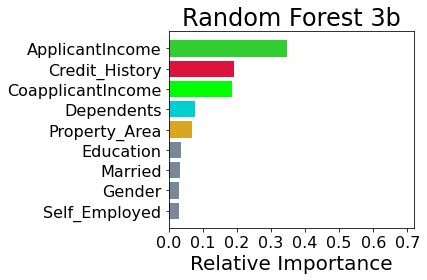

In [55]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 9
colors[8] = 'limegreen'
colors[7] = 'crimson'
colors[6] = 'lime'
colors[5] = 'darkturquoise'
colors[4] = 'goldenrod'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('Random Forest 3b', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_3b.png')
plt.show()



#https://scikit-learn.org/stable/modules/ensemble.html#forest
#max_features=None, max_depth=None, min_samples_split=2 suggested (in this particular case, decreased score by about 0.05)

#Also suggest: "...in random forests, bootstrap samples are used by default (bootstrap=True) while the default strategy for extra-trees is to use the whole dataset (bootstrap=False). When using bootstrap sampling the generalization accuracy can be estimated on the left out or out-of-bag samples. This can be enabled by setting oob_score=True."

## 8a. Random Forest 4a: , random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in previous runs ( 'Gender', 'Education', 'Self_Employed', 'Married') - Combined incomes

In [56]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome" ], axis=1)
feature_names = data.columns

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [58]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6682464454976303
Test score:  0.6950354609929078


In [59]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6646821130137908, 'TotalIncome'),
 (0.20493224570759788, 'Credit_History'),
 (0.0722582682450852, 'Dependents'),
 (0.05812737303352609, 'Property_Area')]

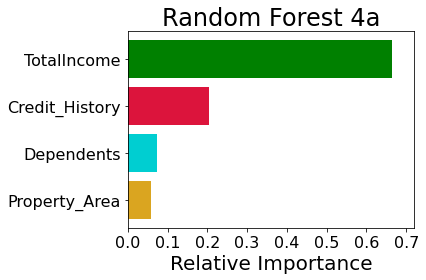

In [60]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 4
colors[3] = 'green'
colors[2] = 'crimson'
colors[1] = 'darkturquoise'
colors[0] = 'goldenrod'
plt.title('Random Forest 4a', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_4a.png')
plt.show()



## 8b. Random Forest 4b: , random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in previous runs ( 'Gender', 'Education', 'Self_Employed', 'Married') - Applicant and co-applicant income separate

In [61]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "TotalIncome"], axis=1)
feature_names = data.columns

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [63]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6966824644549763
Test score:  0.7092198581560284


In [64]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4527816976748015, 'ApplicantIncome'),
 (0.22448716371658345, 'CoapplicantIncome'),
 (0.20078580307690644, 'Credit_History'),
 (0.06437959512026085, 'Dependents'),
 (0.05756574041144782, 'Property_Area')]

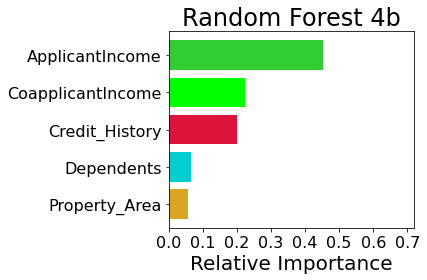

In [65]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 5
colors[4] = 'limegreen'
colors[3] = 'lime'
colors[2] = 'crimson'
colors[1] = 'darkturquoise'#dep
colors[0] = 'goldenrod'#mar
plt.title('Random Forest 4b', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_4b.png')
plt.show()


### 9a. Decision Tree 5: Limited set, smaller decision tree, combined income

In [66]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [67]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome" ], axis=1)
feature_names = data.columns

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [69]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7588652482269503

In [70]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_5',view=True)

'../static/images/Decision_tree_5.png'

### 9b. Decision Tree 6: Limited set, smaller decision tree, incomes separate

In [71]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [72]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "TotalIncome"], axis=1)
feature_names = data.columns

In [73]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [74]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7375886524822695

In [75]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_6',view=True)
#graph

'../static/images/Decision_tree_6.png'